# <font color=blue>Introduction</font>

---
> Version 1.2

This is the notebook of the *Small-data learning* project.

## Mount gdrive

In [1]:
from google.colab import drive
from google.colab import files
import os


# Handy function to report errors.

def fault(msg):
  raise ValueError(msg)

# Mount the google drive

#drive.mount('/gdrive/Shareddrives/Data_Embrapa/Planilhas')
drive.mount('/gdrive/')


Mounted at /gdrive/


New in this version:


* Toggle normalization on/off
* Toggle delta filter on/off
* Choose between NCD and Euclidian distance metrics
* Improved docx vizualization


In [32]:
cp "/gdrive/MyDrive/dataset_fome_imputados_v2.csv" "/boot/"


In [118]:
# cp "/gdrive/MyDrive/ops.csv" "/boot/"

In [30]:
import pandas as pd
import ast
import numpy as np

# Replace 'array_column_names' with the actual column names that contain arrays
def vs_mean_inplace(df):
  array_column_names = ['V11','V12','V14','V15','V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

  # Define a function to calculate the mean of an array
  def calculate_mean(arr):
      # Safely convert the string representation of the list to an actual list
      arr = ast.literal_eval(arr)
      return np.mean(arr)

  # Apply the calculate_mean function to the specified columns
  for col in array_column_names:
      df[col] = df[col].apply(lambda x: calculate_mean(x))

# Now, df contains the means in place of the arrays in the specified columns

# Replace 'array_column_names' with the actual column names that contain arrays
def vs_median_inplace(df):
  array_column_names = ['V11','V12','V14','V15','V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

  # Define a function to calculate the mean of an array
  def calculate_mean(arr):
      # Safely convert the string representation of the list to an actual list
      arr = ast.literal_eval(arr)
      return np.median(arr)

  # Apply the calculate_mean function to the specified columns
  for col in array_column_names:
      df[col] = df[col].apply(lambda x: calculate_mean(x))

# Now, df contains the means in place of the arrays in the specified columns


def remove_upper_outliers_inplace(df):
    array_column_names = ['V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

    def get_concatenate_array(df, coluna : str ):
      return np.concatenate(df[coluna].apply(lambda x: ast.literal_eval(x)).values)


    # Define a function to remove upper outliers from an array using IQR
    def remove_upper_outliers(arr, lower_bound, upper_bound): #,threshold):
        # Safely convert the string representation of the list to an actual list
        arr = ast.literal_eval(arr)

        #print(np.median(arr))

        arr_no_upper_outliers = [value for value in arr if value <=  upper_bound]#threshold ]

        arr_no_outliers = [value for value in arr_no_upper_outliers if value >=  lower_bound]

        return f"{arr_no_outliers}"

    # Apply the remove_upper_outliers function to the specified columns
    for col in array_column_names:
        concat_arr= get_concatenate_array(coluna=col,df=df)


        # finding the 1st quartile
        q1 = np.quantile(concat_arr, 0.25)

        # finding the 3rd quartile
        q3 = np.quantile(concat_arr, 0.75)
        med = np.median(concat_arr)

        # finding the iqr region
        iqr = q3-q1

        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)

        #threshold= np.mean(concat_arr) + 1.5*np.std(concat_arr)

        df[col] = df[col].apply(lambda x: remove_upper_outliers(x,lower_bound,upper_bound))


def remove_upper_outliers_inplace(df):
    array_column_names = ['V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

    def get_concatenate_array(df, coluna : str ):
      return np.concatenate(df[coluna].apply(lambda x: ast.literal_eval(x)).values)


    # Define a function to remove upper outliers from an array using IQR
    def remove_upper_outliers(arr, lower_bound, upper_bound): #,threshold):
        # Safely convert the string representation of the list to an actual list
        arr = ast.literal_eval(arr)

        #print(np.median(arr))

        arr_no_upper_outliers = [value for value in arr if value <=  upper_bound]#threshold ]

        arr_no_outliers = [value for value in arr_no_upper_outliers if value >=  lower_bound]

        return f"{arr_no_outliers}"

    # Apply the remove_upper_outliers function to the specified columns
    for col in array_column_names:
        concat_arr= get_concatenate_array(coluna=col,df=df)


        # finding the 1st quartile
        q1 = np.quantile(concat_arr, 0.25)

        # finding the 3rd quartile
        q3 = np.quantile(concat_arr, 0.75)
        med = np.median(concat_arr)

        # finding the iqr region
        iqr = q3-q1

        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)

        #threshold= np.mean(concat_arr) + 1.5*np.std(concat_arr)

        df[col] = df[col].apply(lambda x: remove_upper_outliers(x,lower_bound,upper_bound))



def inplace_poor_dataset(df, column_name= 'Renda média domiciliar\nR$'):
    # Calculate the threshold for the 25% lowest values
    threshold = df[column_name].quantile(0.25)

    # Keep only the rows where the column values are below the threshold
    df = df[df[column_name] <= threshold]

    display(df)

def inplace_rich_dataset(df, column_name= 'Renda média domiciliar\nR$'):
    # Calculate the threshold for the 25% lowest values
    threshold = df[column_name].quantile(0.75)

    # Keep only the rows where the column values are below the threshold
    df = df[df[column_name] >= threshold]



In [26]:
data_path_with_names = "/boot/dataset_fome_imputados_v2.csv"

# Read the CSV file into a DataFrame
data_path_embrapa = pd.read_csv(data_path_with_names)

In [27]:
data_path_embrapa.columns

Index(['Unnamed: 0', 'Nome da Área', 'Número de Domicílios',
       'Número de Habitantes', 'Renda média domiciliar\nR$',
       'Densidade de estabelecimentos saudáveis (in natura + misto)\n10 mil hab',
       'Densidade de estabelecimentos não saudáveis (ultraprocessados)\n10 mil hab',
       'Número de feiras livres',
       'Número de estabelecimentos In natura na base da RAIS',
       'Número de estabelecimentos mistos na base da RAIS',
       'Número de estabelecimentos ultraprocessados na base da RAIS',
       'Total de estabelecimentos de alimentação na base da RAIS',
       'Hipermercados\ncnae 4711301', 'Supermercados\ncnae 4711302',
       'Minimercados, mercearias e armazéns\ncnae 4712100',
       'Padaria e confeitaria de revenda\ncnae 4721102',
       'Varejista de laticínios e frios\ncnae 4721103',
       'Varejista de doces, balas, bombons e semelhantes\ncnae 4721104',
       'Açougues\ncnae 4722901', 'Peixarias\ncnae 4722902',
       'Varejista de hortifrutigranjeiros\

In [33]:
import pandas as pd
import regex as re

# Define the path to the CSV file
data_path_with_names = "/boot/dataset_fome_imputados_v2.csv"

# Read the CSV file into a DataFrame
data_path_embrapa = pd.read_csv(data_path_with_names)

data_path_embrapa = data_path_embrapa.loc[:, ~data_path_embrapa.columns.str.contains('^Unnamed')]

# if want to use mean instead of array
remove_upper_outliers_inplace(data_path_embrapa)
vs_median_inplace(data_path_embrapa)
inplace_poor_dataset(data_path_embrapa)

# Modify column names to have at most 6 characters and keep only alphanumeric characters
data_path_embrapa.columns = [re.sub(r'[^a-zA-Z0-9]', '', col)[-7:] for col in data_path_embrapa.columns]



# Remove the index column
data_path_embrapa.to_csv(data_path_with_names, index=False)


,Nome da Área,Número de Domicílios,Número de Habitantes,Renda média domiciliar\nR$,Densidade de estabelecimentos saudáveis (in natura + misto)\n10 mil hab,Densidade de estabelecimentos não saudáveis (ultraprocessados)\n10 mil hab,Número de feiras livres,Número de estabelecimentos In natura na base da RAIS,Número de estabelecimentos mistos na base da RAIS,Número de estabelecimentos ultraprocessados na base da RAIS,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,obj_in_natura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,192.0,1622.37245,466.83950,44.42210,822.02635,95.16685,52.81385,46.18950,100.0,89
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,187.0,1643.51165,487.53540,43.48140,841.41050,95.34880,52.97730,44.70380,100.0,84
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,187.0,1426.08790,414.07170,43.08000,782.28240,96.15380,56.02200,44.66270,100.0,14
5,grajau,103074,360512,1577.49,11.68,3.02,18,80,323,109,...,164.0,1484.77590,437.81250,43.52000,795.80730,94.31355,53.85475,44.62690,100.0,36
6,guaianases,30547,103844,1752.58,15.50,4.33,13,26,122,45,...,161.0,1703.01280,507.53080,45.08685,941.35870,95.45450,55.96400,47.00000,100.0,43
7,iguatemi,36151,127636,1505.35,13.40,2.59,9,48,114,33,...,183.0,1446.63640,405.89490,43.33190,781.54040,94.13085,55.63480,45.05570,100.0,28
8,itaim paulista,64319,223950,1514.55,12.95,5.18,15,51,224,116,...,184.0,1430.52580,413.57390,44.52310,759.08290,94.73680,54.24445,46.01450,100.0,68
10,jaragua,53239,184635,1936.52,13.59,3.41,13,45,193,63,...,190.5,1827.77420,544.81730,45.01190,974.47420,97.02970,53.85470,46.17440,100.0,65
11,jardim angela,86894,295324,1452.55,13.75,2.95,6,67,333,87,...,187.0,1441.36625,422.77810,42.34935,768.48840,93.58290,54.89030,43.63490,100.0,15
12,jose bonifacio,37832,124009,1870.17,8.31,3.06,10,15,78,38,...,179.0,1907.81020,598.55585,45.83770,950.50620,97.22220,54.63745,47.77630,100.0,12


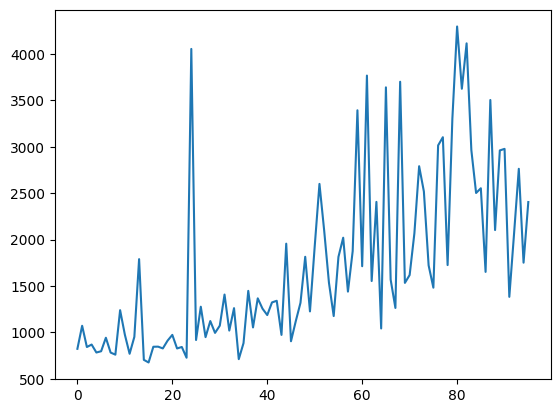

In [35]:
import matplotlib.pyplot as plt


plt.plot(data_path_embrapa['V28'])

# <font color=blue>Setup</font>
> Please, configure the following options.

In [36]:
## CHO0SE THE DATASET
import pandas as pd
#objectives = ["'Output'",	"'Tmelt'",	"'Power'","'Lmelting'",	"'WATS'",	"'ViscousD'"]
#vars = ["'Screw'", "'Grooves'", "'RBS'", "'Dext'", "'D1'", "'D3'", "'Lfeed'", "'L1'", "'L2'", "'L3'",	"'Pitch'", "'Tfeed'",	"'Tbarrel'", "'N'", "'Model'", "'bN'", "'hN1'", "'hN2'", "'NN'", "'Lg1'", "'Lg2'", "'B'", "'Type'", "'Lrbs'", "'Lrbs-L'", "'Nb'", "'ERROR'"]
type_of_columns=""# "numerical"

#data_path_with_names = "/boot/aggregated_dataset_joined_semn.csv"
data_path_with_names = "/boot/dataset_fome_imputados_v2.csv"
data_path_embrapa = pd.read_csv(data_path_with_names)

# # filter columns by pattern match
# v_columns = data_path_embrapa.columns#filter(regex='^V\d+')

# # print selected columns
# print(v_columns.columns)

# v_columns.to_csv("/boot/dataset_fome_imputados_v1.csv",index=False)

data_path_embrapa #= v_columns
# Define decision variables and objetives
columns=[]
objectives = ["'24'"]  # objetivos relacionados com sustentabilidade (Sandra)

vars = []
#data_path_embrapa.columns
v_columns= data_path_embrapa
idx=0
for var in data_path_embrapa.columns:
    vars.append(str("'"+str(idx)+"'"))
    columns.append(var)
    idx+=1
df_numeric=data_path_embrapa.copy()
columns_names=df_numeric.columns
for i in range(len(df_numeric.columns)):
  # transform columns to numbers
  df_numeric = df_numeric.rename({df_numeric.columns[i]:str(i)}, axis='columns')
df_numeric.to_excel("/boot/data.xlsx",sheet_name='Plan1',index=False)
if type_of_columns=="numerical":
  data_path="/boot/data.xlsx"
else:
  #cp "/gdrive/Shareddrives/Data_Embrapa/Planilhas/Siglas_dados_FPS_2019_2021.xlsx" "/boot/" #Siglas_dados_FPS_2019_2021.xlsx
  #data_path="/boot/aggregated_dataset_joined_semn.csv"
  data_path = "/boot/dataset_fome_imputados_v2.csv"
  df_siglas=v_columns
  #df_siglas.reset_index()
  for i in range(len(objectives)):
    objectives[i]=str("'"+df_siglas.columns[int(objectives[i].replace("'",""))]+"'")
  for i in range(len(vars)):
    vars[i]=str("'"+df_siglas.columns[int(vars[i].replace("'",""))]+"'")
print(vars+objectives)
#print(len(df_siglas.columns))
#df_siglas.columns
df_siglas

#####
objectives=vars # here is the new change

["'medarea'", "'miclios'", "'itantes'", "'ciliarR'", "'0milhab'", "'0milhab.1'", "'slivres'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'4711301'", "'4711302'", "'4712100'", "'4721102'", "'4721103'", "'4721104'", "'4722901'", "'4722902'", "'4724500'", "'4729602'", "'4729699'", "'5611201'", "'5611202'", "'5611203'", "'5612100'", "'5620103'", "'numIPVS'", "'V11'", "'V12'", "'V14'", "'V15'", "'V17'", "'V18'", "'V19'", "'V27'", "'V28'", "'V29'", "'V31'", "'V32'", "'V43'", "'nnatura'", "'5611203'"]


In [37]:
#from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


number of samples tree

In [38]:
##
## Chose resampling options
##

# If sample_total is 1, then resampling is disabled: cophenetic and membership
# information refers to the tree resulting from the original table. Otherwise
# resampling is enabled: cophenetic and membership information refer to the
# consensus tree formed by resamplings of the input data.

sample_total = 32 # 23       # If 1, then resampling is disabled
sample_replacement = True   # If resampling on, with or without replacement


##
## DOCX report path
##

# The resulting report in docx format will be saved here

report_path = "/gdrive/Shareddrives/Data_Embrapa/Reports/report" +str(sample_total)+".docx"


In [39]:
##
## Transform input data (preprocessing)
##

# Apply normalization

transf_normalize = False #True

# Use delta encoding

transf_delta = False

In [40]:
##
## Choose between NCD and Vector Distance
##

# Values = 'ncd', 'vd'

dist_type = 'ncd'

In [41]:
##
## Chose the colors used by colored trees
##

alt_colors = [
 'rgba(80%, 0%, 0%,1.000)',  # Red
 'rgba(0%, 80%, 0%,1.000)',  # Green
 'rgba(0%,0%,80%,1.000)',    # Blue
 'rgba(0%,40%,40%,1.000)',   # Cyan
 'rgba(80%,80%,0%,1.000)',   # Yellow
 'rgba(80%,0%,80%,1.000)',   # Magenta
 'rgba(100%,50%,0%,1.000)',  # Orange
 'rgba(50%,0%,100%,1.000)',  # Purple
 'rgba(100%,0%,100%,1.000)', # Pink
 'rgba(0%,50%,100%,1.000)',  # Sky-blue
 'rgba(100%,20%,50%,1.000)', # Rose
 'rgba(50%,50%,0%,1.000)',   # Olive
 'rgba(40%,20%,0%,1.000)',   # Brown
 'rgba(40%,40%,40%,1.000)',  # Gray
 'rgba(0%,0%,0%,1.000)'      # Black
]

color_names = ['Red', 'Green', 'Blue', 'Cyan', 'Yellow', 'Magenta', 'Orange', 'Purple', 'Pink', 'Sky-blue', 'Rose', 'Olive', 'Brown', 'Gray', 'Black']

# A function to print colored text

def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

show_color_list = False         # Ucomment to show color list

if show_color_list == True:
  count=0;
  for i in alt_colors:
    s = i.replace('rgba','')
    s = s.replace('(','')
    s = s.replace(')','')
    r,g,b,a = s.split(',')
    r = r.split('%')[0]
    g = g.split('%')[0]
    b = b.split('%')[0]
    red = int(float(r)*255/100)
    green = int(float(g)*255/100)
    blue = int(float(b)*255/100)
    rgb_color = "{0:>3d} {1:>3d} {2:>3d}".format(red,green,blue)
    print(colored(0,0,0,"{0:2d}".format(count)), colored(red,green,blue,  rgb_color + '   ' +color_names[count]))
    count += 1;

## <font color=blue>Set up file system</font>
> <font color=darkblue>If execution stalls, check this cell to verify authentication</font>

# <font color=blue>Read input</font>


In [42]:
from openpyxl import Workbook, load_workbook
import csv

# csv.field_size_limit(2 ** 31 - 1)
# xlsx_max_cell_length = 32767

wb = Workbook()
ws = wb.active

supported_extensions = ['.xls', '.xlsx', '.csv']

# Check if the data file exists

if not os.path.lexists(data_path):
  fault ("Data file "+data_path+" not found")

# Check if data file is of one of the supported types

file_name, file_extension = os.path.splitext(data_path)
if file_extension.lower() not in supported_extensions:
  fault()

# If data file is a CSV file, convert it to XSL and save a copy of the
# converted file for convenience.

data_path_xlsx = data_path.replace(file_extension,".xlsx")

if file_extension.lower() == '.csv':
  print ("It's a csv, converting to xls.")
  with open(data_path, 'r') as f:
    for row in csv.reader(f):
      # print(row)
      ws.append(row)
    wb.save(data_path_xlsx)

# Load the XSL file

wb = load_workbook(data_path_xlsx)

It's a csv, converting to xls.


In [43]:
# Get the spreadshit

sheets = wb.sheetnames
ws = wb[sheets[0]]

In [44]:
#@title
# Get a Pandas dataframe

import pandas as pd

table = pd.read_excel(data_path_xlsx, header=[0])
df = pd.DataFrame(table)


In [45]:
df

,medarea,miclios,itantes,ciliarR,0milhab,0milhab.1,slivres,edaRAIS,edaRAIS.1,edaRAIS.2,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,nnatura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,192.0,1622.37245,466.83950,44.42210,822.02635,95.16685,52.81385,46.18950,100.0,89
1,cachoeirinha,42683,143425,2313.96,14.43,5.51,8,45,154,79,...,184.0,2041.36730,617.00190,45.96320,1070.28615,96.65870,55.12105,47.52170,100.0,20
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,187.0,1643.51165,487.53540,43.48140,841.41050,95.34880,52.97730,44.70380,100.0,84
3,cidade ademar,80858,266542,2136.93,15.53,5.55,15,98,301,148,...,208.0,1675.41780,507.81040,44.45015,867.91365,94.87910,51.80195,45.75630,100.0,74
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,187.0,1426.08790,414.07170,43.08000,782.28240,96.15380,56.02200,44.66270,100.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,se,9098,23595,2370.40,192.41,172.92,1,116,337,408,...,214.5,2128.43800,860.97945,43.82445,1382.15730,98.41300,62.01640,47.25615,100.0,147
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,223.0,3610.82825,1214.83790,51.60340,2063.54125,98.84535,56.05145,53.17255,100.0,38
93,tatuape,32734,91140,6033.36,44.77,37.85,10,23,375,345,...,182.0,4890.63165,1829.11580,51.13200,2762.12795,100.00000,59.94660,53.46770,100.0,128
94,vila guilherme,17750,54218,3702.28,36.33,28.22,9,18,170,153,...,203.0,3403.03785,1108.48600,50.85530,1750.37590,98.33085,54.55260,53.91670,100.0,49


# <font color=blue>Transform input data</font>

### Normalize and add noise
> Avoid ill-conditioning due to zero distances <br/>
> Add small random noise

In [46]:
import numpy as np

if transf_normalize == True:
  df_norm = df.copy()

  #dft = df[:].astype(float).copy()
  for i in df.columns:
    if df[i].dtypes != np.object:
      df[i].astype(float)
  dft = df.copy()

  maxs = dft[:].max()
  for m, c in zip(maxs,df.columns):
    # a noise avoids zero distances, as consequence, their ill-conditioning due to them
    ##df[c] = dft[c].apply(lambda x: ((x/m)+np.random.normal(0,10**-12,1)[0]).round(6)  if m !=0 else 0+np.random.normal(0,10**-12,1)[0])
    if dft[c].dtype != np.object:
      dft[c] = dft[c].apply(lambda x: (x/m if m !=0 else x) )
    #dft[c] = dft[c].apply(lambda x: (x/m  if m !=0 else 0) )
    #translating data to the center of each variable range: (x - mu)
    #Each variable has the same center of mass, zero
    #df[c] = dft[c].apply(lambda x: (x - dft[c].mean() + 10**-6)) #+10**-6 to avoid zero weights between vars
    df_norm[c] = dft[c].copy()
  df_norm.columns = dft.columns
  df = df_norm.copy()

In [47]:
df.columns

Index(['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1',
       'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301',
       '4711302', '4712100', '4721102', '4721103', '4721104', '4722901',
       '4722902', '4724500', '4729602', '4729699', '5611201', '5611202',
       '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15',
       'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43',
       'nnatura'],
      dtype='object')

## Use delta encoding

In [48]:

delta_down = 0
delta_none = 1
delta_up = 2

if transf_delta == True:
  dft = df[:].astype(int).copy()

  for col in dft:
    last = dft.loc[0,col]
    dft.loc[0,col] = delta_none
    for row in range(1,30):

      tmp = dft.loc[row,col]

      if dft.loc[row, col] > last:
        dft.loc[row,col]=delta_up
      elif dft.loc[row, col] < last:
        dft.loc[row,col]=delta_down
      else:
        dft.loc[row,col]=delta_none
      last = tmp
  df = dft.copy()



In [49]:
df

,medarea,miclios,itantes,ciliarR,0milhab,0milhab.1,slivres,edaRAIS,edaRAIS.1,edaRAIS.2,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,nnatura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,192.0,1622.37245,466.83950,44.42210,822.02635,95.16685,52.81385,46.18950,100.0,89
1,cachoeirinha,42683,143425,2313.96,14.43,5.51,8,45,154,79,...,184.0,2041.36730,617.00190,45.96320,1070.28615,96.65870,55.12105,47.52170,100.0,20
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,187.0,1643.51165,487.53540,43.48140,841.41050,95.34880,52.97730,44.70380,100.0,84
3,cidade ademar,80858,266542,2136.93,15.53,5.55,15,98,301,148,...,208.0,1675.41780,507.81040,44.45015,867.91365,94.87910,51.80195,45.75630,100.0,74
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,187.0,1426.08790,414.07170,43.08000,782.28240,96.15380,56.02200,44.66270,100.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,se,9098,23595,2370.40,192.41,172.92,1,116,337,408,...,214.5,2128.43800,860.97945,43.82445,1382.15730,98.41300,62.01640,47.25615,100.0,147
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,223.0,3610.82825,1214.83790,51.60340,2063.54125,98.84535,56.05145,53.17255,100.0,38
93,tatuape,32734,91140,6033.36,44.77,37.85,10,23,375,345,...,182.0,4890.63165,1829.11580,51.13200,2762.12795,100.00000,59.94660,53.46770,100.0,128
94,vila guilherme,17750,54218,3702.28,36.33,28.22,9,18,170,153,...,203.0,3403.03785,1108.48600,50.85530,1750.37590,98.33085,54.55260,53.91670,100.0,49


*texto em itálico*## Avoid zero distances
This is needed for vector-distance metric

In [50]:
if dist_type == 'vd':
  df_noise = df.copy()
  dft = df[:].astype(float).copy()
  maxs = dft[:].max()
  for m, c in zip(maxs,df.columns):
    #dft[c] = dft[c].apply(lambda x: (x  if x !=0 else 0+10**-6) )
    #dft[c] = dft[c].apply(lambda x: (x  + 10**-6) )
    if dft[c].dtype != np.object:
      dft[c] = dft[c].apply(lambda x: (x  + np.random.uniform(0,1,1)[0]*10**-6 ))
    df_noise[c] = dft[c].copy()
  df_noise.columns = dft.columns
  df = df_noise.copy()
df

,medarea,miclios,itantes,ciliarR,0milhab,0milhab.1,slivres,edaRAIS,edaRAIS.1,edaRAIS.2,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,nnatura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,192.0,1622.37245,466.83950,44.42210,822.02635,95.16685,52.81385,46.18950,100.0,89
1,cachoeirinha,42683,143425,2313.96,14.43,5.51,8,45,154,79,...,184.0,2041.36730,617.00190,45.96320,1070.28615,96.65870,55.12105,47.52170,100.0,20
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,187.0,1643.51165,487.53540,43.48140,841.41050,95.34880,52.97730,44.70380,100.0,84
3,cidade ademar,80858,266542,2136.93,15.53,5.55,15,98,301,148,...,208.0,1675.41780,507.81040,44.45015,867.91365,94.87910,51.80195,45.75630,100.0,74
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,187.0,1426.08790,414.07170,43.08000,782.28240,96.15380,56.02200,44.66270,100.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,se,9098,23595,2370.40,192.41,172.92,1,116,337,408,...,214.5,2128.43800,860.97945,43.82445,1382.15730,98.41300,62.01640,47.25615,100.0,147
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,223.0,3610.82825,1214.83790,51.60340,2063.54125,98.84535,56.05145,53.17255,100.0,38
93,tatuape,32734,91140,6033.36,44.77,37.85,10,23,375,345,...,182.0,4890.63165,1829.11580,51.13200,2762.12795,100.00000,59.94660,53.46770,100.0,128
94,vila guilherme,17750,54218,3702.28,36.33,28.22,9,18,170,153,...,203.0,3403.03785,1108.48600,50.85530,1750.37590,98.33085,54.55260,53.91670,100.0,49


# <font color=blue>Resample</font>
> Resample the rows in the worksheet

In [51]:
# Get a list of resampled dataframes

resampled_df_l = [df]             # The original data set
for i in range(sample_total-1):   # Plus a few more
  resampled_df_l += [df.sample(n=df.shape[0], replace=sample_replacement)]

In [52]:
 resampled_df_l[1]

,medarea,miclios,itantes,ciliarR,0milhab,0milhab.1,slivres,edaRAIS,edaRAIS.1,edaRAIS.2,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,nnatura
79,consolacao,26339,57138,8180.43,42.88,47.78,6,10,229,273,...,175.0,5011.77870,2149.27350,48.14500,3300.34690,100.00000,68.19470,49.98735,100.0,82
74,bom retiro,10620,32366,2922.30,73.22,77.86,3,17,217,252,...,205.0,3075.24410,981.94470,47.13210,1720.99715,98.77175,52.42500,49.35790,100.0,18
38,pirituba,53342,167825,3034.21,17.52,6.67,18,57,219,112,...,196.5,2548.67285,819.81000,48.54610,1365.95080,97.78505,55.38910,50.52940,100.0,59
46,vila medeiros,39905,129836,2355.98,16.64,7.01,10,49,157,91,...,176.0,2225.28240,690.88380,49.68240,1118.32700,96.90720,52.03052,51.49450,100.0,49
48,agua rasa,28652,84787,4009.81,31.14,13.80,14,63,187,117,...,218.0,3369.55950,1124.71225,52.60625,1813.86790,98.81185,55.43915,54.46115,100.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,cambuci,12645,35322,4970.44,33.41,31.71,2,8,108,112,...,231.0,4103.21865,1528.63760,50.25410,2599.36200,98.92975,60.44560,51.24390,100.0,16
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,187.0,1643.51165,487.53540,43.48140,841.41050,95.34880,52.97730,44.70380,100.0,84
69,vila matilde,33491,104642,3085.71,29.82,16.05,12,47,253,168,...,225.5,2927.03590,923.99800,50.36870,1532.56790,98.34020,55.32480,53.09900,100.0,23
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,223.0,3610.82825,1214.83790,51.60340,2063.54125,98.84535,56.05145,53.17255,100.0,38


In [53]:
# For each resampling, create a directory and save all column-files in it.

from distutils.dir_util import mkpath

resampledsource = os.path.join('/boot/', ws.title)
mkpath(resampledsource)
for i, dfrs in enumerate(resampled_df_l):
  datasource = os.path.join(resampledsource, ws.title+str(i))
  mkpath(datasource)
  for v in dfrs.columns:
    if(type(v)==str):
      fname = v.replace("/","-")
      with open(os.path.join(datasource,fname), "w") as f:
        f.write( str(dfrs[v]) )

# Show contents, for convenience
#files.view('/content/')

# <font color=blue>Build alternative distance matrix </font>
> Use scikit

In [54]:
#for i in df.columns:
#  if df[i].dtypes == np.object:
#    print ('Colum', i , 'is not numeric')
#    print ('This condition is not yet supported by the selected distance metric')
#    raise SystemExit("Aborted. Unsupported feature")

In [55]:
from sklearn.metrics import pairwise_distances

def save_dist_matrix(dm, fname):
  f = open(fname, 'w+') #'dm-sklearn.csv', 'w+')
  f.write('x,y,zx,zy,zxy,ncd')
  leaves = df.columns
  i = 0
  for di, labels in zip(dm,df.columns):
    i += 1
    for j, dij in enumerate(di):
      #print(i, di, j)
      if j>i:
        #f.write('\nf'+str(i)+',f'+str(j)+',0,0,0,'+str(dij))
        f.write('\n'+str(leaves[i-1])+','+str(leaves[j])+',0,0,0,'+str(dij))
  f.write('\n')
  f.close()
  return

os.makedirs('/content/input-dm-sklearn', exist_ok=True)

In [56]:
if dist_type == 'vd':
 for i, df_i in enumerate(resampled_df_l):
   Z = df_i.values.T
   dm = pairwise_distances(Z, Z, metric="euclidean")#metric="chebyshev")#, metric="nan_euclidean)#<==RESULTsimilar2CHEBYSHEV metric="seuclidean")#<==RESULTsimilar2CHEBYSHEV#, metric="minkowski")#<==RESULTsimilar2CHEBYSHEV#, metric="chebyshev")<==BestFound #, metric="manhattan") #, metric="cosine")#, metric="euclidean")
   dm = dm/np.max(dm)
   fname = '/content/input-dm-sklearn/dm-sklearn-'+str(i)+'.csv'
   save_dist_matrix(dm, fname)

# <font color=blue>Run DAMICORE</font>


## Install tools

> damicore, igraph, cairocffi



In [57]:
# Intall damicore
!pip install git+https://gitlab.uspdigital.usp.br/acbd/damicore-python3.git

  Cloning https://gitlab.uspdigital.usp.br/acbd/damicore-python3.git to /tmp/pip-req-build-7obvn6jt
  Running command git clone --filter=blob:none --quiet https://gitlab.uspdigital.usp.br/acbd/damicore-python3.git /tmp/pip-req-build-7obvn6jt
  Resolved https://gitlab.uspdigital.usp.br/acbd/damicore-python3.git to commit 7a4a51525db0d698c588eecf24cd84d10473d46f
  Preparing metadata (setup.py) ... done
  Created wheel for damicore: filename=damicore-0.1.0-py3-none-any.whl size=49726 sha256=5a58c39071f0b0f2dc40d8b92b57bb74eef3398b30e58122d842749c0eef2358
  Stored in directory: /tmp/pip-ephem-wheel-cache-tjlpi88x/wheels/a9/8f/15/0592755eb33008a33bb8b1663661a0c02522581460bb166053
Successfully built damicore


In [58]:
# Install igraph
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.8 MB/s eta 0:00:00


In [59]:
# Install cairocffi (run igraph utilities)
!pip install cairocffi #to run igraph drawing utilities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 1.9 MB/s eta 0:00:00


$$ $$

In [60]:
!pip list -v | grep damicore > whereisit

## Actually execute damicore

In [61]:
# Locate damicore
!pip list -v | grep damicore > whereisit
f = open("whereisit")
strs = f.read()
dmpath = strs.split()[2]
dmpath

os.chdir(dmpath+"/damicore")

In [62]:
# Run DAMICORE for each resampling

import damicore   #%pycat damicore.py

results = "/content/results/"
mkpath(results)

for m in os.listdir(resampledsource):
  resampleddatasource = (os.path.join(resampledsource,m))
  argv = ["damicore.py", "--compressor", "gzip", "--results-dir", results, resampleddatasource]
  args = argv[1:]
  print(args)
  print(columns)
  damicore.main(args)

['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet8']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,7
4711302,1
4712100,0
4721102,0
4721103,1
4721104,0
4722901,0
4722902,7
4724500,0
4729602,7
4729699,0
5611201,6
5611202,1
5611203,6
5612100,1
5620103,7
V11,4
V12,4
V14,3
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,2
edaRAIS.1,2
edaRAIS.2,2
edaRAIS.3,2
itantes,3
medarea,3
miclios,3
nnatura,6
numIPVS,7
slivres,3
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet6']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,6
4721102,0
4721103,0
4721104,0
4722901,0
4722902,7
4724500,0
4729602,7
4729699,6
5611201,1
5611202,0
5611203,1
5612100,4
5620103,4
V11,2
V12,2
V14,2
V15,3
V17,2
V18,3
V19,3
V27,3
V28,3
V29,3
V31,3
V32,3
V43,4
ciliarR,3
edaRAIS,5
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,4
slivres,4
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet29']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,5
4711302,0
4712100,0
4721102,0
4721103,5
4721104,0
4722901,0
4722902,5
4724500,0
4729602,5
4729699,0
5611201,1
5611202,0
5611203,1
5612100,1
5620103,1
V11,3
V12,3
V14,3
V15,4
V17,3
V18,4
V19,4
V27,4
V28,4
V29,4
V31,4
V32,4
V43,2
ciliarR,4
edaRAIS,0
edaRAIS.1,2
edaRAIS.2,2
edaRAIS.3,2
itantes,2
medarea,2
miclios,2
nnatura,0
numIPVS,5
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet4']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,1
0milhab.1,1
4711301,8
4711302,7
4712100,0
4721102,7
4721103,8
4721104,7
4722901,7
4722902,8
4724500,7
4729602,8
4729699,7
5611201,0
5611202,7
5611203,0
5612100,0
5620103,8
V11,2
V12,2
V14,1
V15,3
V17,2
V18,5
V19,5
V27,4
V28,5
V29,4
V31,4
V32,4
V43,1
ciliarR,3
edaRAIS,0
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,1
medarea,1
miclios,1
nnatura,0
numIPVS,8
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet5']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,1
4721102,7
4721103,0
4721104,7
4722901,7
4722902,6
4724500,7
4729602,6
4729699,7
5611201,1
5611202,0
5611203,1
5612100,0
5620103,6
V11,5
V12,5
V14,5
V15,3
V17,5
V18,4
V19,4
V27,3
V28,4
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,1
edaRAIS.1,1
edaRAIS.2,1
edaRAIS.3,1
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,6
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet18']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,1
4721102,0
4721103,7
4721104,0
4722901,7
4722902,6
4724500,7
4729602,6
4729699,7
5611201,1
5611202,0
5611203,1
5612100,1
5620103,6
V11,4
V12,4
V14,3
V15,3
V17,4
V18,3
V19,3
V27,3
V28,3
V29,3
V31,3
V32,3
V43,1
ciliarR,3
edaRAIS,1
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,1
medarea,2
miclios,2
nnatura,1
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet26']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...
Simplifying graph...
Clustering elements...


0milhab,4
0milhab.1,4
4711301,7
4711302,0
4712100,0
4721102,7
4721103,1
4721104,0
4722901,7
4722902,7
4724500,0
4729602,7
4729699,7
5611201,2
5611202,0
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,4
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,7
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet21']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...
Simplifying graph...
Clustering elements...


0milhab,3
0milhab.1,3
4711301,6
4711302,0
4712100,1
4721102,0
4721103,6
4721104,1
4722901,0
4722902,6
4724500,0
4729602,6
4729699,1
5611201,2
5611202,0
5611203,2
5612100,0
5620103,6
V11,3
V12,3
V14,3
V15,4
V17,3
V18,4
V19,4
V27,4
V28,4
V29,4
V31,4
V32,4
V43,3
ciliarR,4
edaRAIS,2
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,6
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet24']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...
Simplifying graph...
Clustering elements...


0milhab,3
0milhab.1,3
4711301,1
4711302,1
4712100,2
4721102,0
4721103,1
4721104,0
4722901,0
4722902,1
4724500,0
4729602,1
4729699,0
5611201,2
5611202,0
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,3
V15,5
V17,4
V18,6
V19,6
V27,5
V28,6
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,7
edaRAIS.1,7
edaRAIS.2,7
edaRAIS.3,7
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet25']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,7
4711302,0
4712100,0
4721102,0
4721103,1
4721104,0
4722901,0
4722902,7
4724500,0
4729602,7
4729699,0
5611201,2
5611202,0
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,3
V15,5
V17,4
V18,5
V19,5
V27,6
V28,5
V29,6
V31,6
V32,6
V43,3
ciliarR,6
edaRAIS,2
edaRAIS.1,2
edaRAIS.2,2
edaRAIS.3,2
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,7
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet16']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...
Simplifying graph...
Clustering elements...


0milhab,2
0milhab.1,2
4711301,4
4711302,0
4712100,1
4721102,1
4721103,5
4721104,1
4722901,0
4722902,4
4724500,0
4729602,4
4729699,5
5611201,1
5611202,0
5611203,1
5612100,5
5620103,4
V11,2
V12,2
V14,2
V15,3
V17,2
V18,3
V19,3
V27,3
V28,3
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,1
edaRAIS.1,1
edaRAIS.2,1
edaRAIS.3,1
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,4
slivres,5
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet30']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...
Simplifying graph...
Clustering elements...


0milhab,3
0milhab.1,3
4711301,9
4711302,1
4712100,2
4721102,0
4721103,9
4721104,0
4722901,0
4722902,9
4724500,0
4729602,9
4729699,0
5611201,2
5611202,1
5611203,2
5612100,1
5620103,9
V11,4
V12,4
V14,3
V15,5
V17,4
V18,6
V19,6
V27,7
V28,6
V29,7
V31,7
V32,7
V43,3
ciliarR,5
edaRAIS,2
edaRAIS.1,8
edaRAIS.2,8
edaRAIS.3,8
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,9
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet10']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,0
4721102,0
4721103,7
4721104,0
4722901,1
4722902,7
4724500,0
4729602,7
4729699,0
5611201,1
5611202,1
5611203,1
5612100,1
5620103,7
V11,3
V12,3
V14,3
V15,5
V17,3
V18,4
V19,4
V27,5
V28,4
V29,4
V31,5
V32,5
V43,2
ciliarR,4
edaRAIS,1
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,7
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet0']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,1
4721102,0
4721103,0
4721104,0
4722901,0
4722902,0
4724500,0
4729602,7
4729699,0
5611201,1
5611202,0
5611203,1
5612100,0
5620103,7
V11,2
V12,2
V14,2
V15,3
V17,2
V18,4
V19,4
V27,5
V28,4
V29,5
V31,5
V32,5
V43,2
ciliarR,3
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,7
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet9']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,7
4711302,1
4712100,0
4721102,0
4721103,1
4721104,0
4722901,0
4722902,7
4724500,0
4729602,7
4729699,0
5611201,1
5611202,1
5611203,1
5612100,1
5620103,1
V11,4
V12,4
V14,3
V15,3
V17,4
V18,5
V19,5
V27,3
V28,5
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,0
numIPVS,7
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet13']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,0
4721102,0
4721103,6
4721104,0
4722901,0
4722902,6
4724500,0
4729602,6
4729699,0
5611201,1
5611202,0
5611203,1
5612100,1
5620103,1
V11,3
V12,3
V14,3
V15,3
V17,3
V18,4
V19,4
V27,3
V28,4
V29,3
V31,3
V32,3
V43,1
ciliarR,3
edaRAIS,5
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet15']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,4
0milhab.1,4
4711301,7
4711302,1
4712100,2
4721102,0
4721103,0
4721104,0
4722901,0
4722902,7
4724500,0
4729602,7
4729699,0
5611201,2
5611202,1
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,4
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,4
ciliarR,5
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,7
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet2']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,7
4711302,8
4712100,8
4721102,0
4721103,7
4721104,0
4722901,0
4722902,7
4724500,8
4729602,7
4729699,8
5611201,1
5611202,0
5611203,1
5612100,0
5620103,7
V11,3
V12,3
V14,3
V15,4
V17,3
V18,5
V19,5
V27,4
V28,5
V29,4
V31,4
V32,4
V43,1
ciliarR,4
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,1
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet23']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,8
4711302,9
4712100,9
4721102,9
4721103,7
4721104,7
4722901,0
4722902,8
4724500,9
4729602,8
4729699,9
5611201,9
5611202,0
5611203,1
5612100,7
5620103,8
V11,3
V12,3
V14,2
V15,4
V17,3
V18,4
V19,4
V27,5
V28,4
V29,5
V31,5
V32,5
V43,1
ciliarR,4
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet27']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,0
4711302,7
4712100,1
4721102,7
4721103,6
4721104,7
4722901,0
4722902,6
4724500,0
4729602,6
4729699,1
5611201,1
5611202,7
5611203,1
5612100,0
5620103,0
V11,3
V12,3
V14,3
V15,3
V17,3
V18,4
V19,4
V27,3
V28,4
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,5
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,6
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet28']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,4
0milhab.1,4
4711301,8
4711302,0
4712100,0
4721102,0
4721103,8
4721104,0
4722901,0
4722902,8
4724500,0
4729602,8
4729699,0
5611201,2
5611202,1
5611203,2
5612100,1
5620103,8
V11,4
V12,4
V14,4
V15,5
V17,4
V18,6
V19,6
V27,5
V28,6
V29,5
V31,5
V32,5
V43,4
ciliarR,5
edaRAIS,7
edaRAIS.1,7
edaRAIS.2,7
edaRAIS.3,7
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,8
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet11']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,1
0milhab.1,1
4711301,6
4711302,7
4712100,5
4721102,7
4721103,4
4721104,7
4722901,5
4722902,4
4724500,5
4729602,6
4729699,0
5611201,0
5611202,5
5611203,0
5612100,4
5620103,4
V11,1
V12,1
V14,1
V15,2
V17,1
V18,2
V19,2
V27,2
V28,2
V29,2
V31,2
V32,2
V43,1
ciliarR,2
edaRAIS,3
edaRAIS.1,3
edaRAIS.2,3
edaRAIS.3,3
itantes,1
medarea,1
miclios,1
nnatura,0
numIPVS,6
slivres,4
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet19']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,7
4721102,0
4721103,6
4721104,0
4722901,7
4722902,6
4724500,7
4729602,6
4729699,7
5611201,1
5611202,1
5611203,1
5612100,1
5620103,1
V11,2
V12,2
V14,2
V15,3
V17,2
V18,4
V19,4
V27,3
V28,4
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,5
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,6
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet20']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,1
4721102,0
4721103,7
4721104,7
4722901,0
4722902,6
4724500,0
4729602,6
4729699,1
5611201,1
5611202,0
5611203,1
5612100,7
5620103,6
V11,4
V12,4
V14,3
V15,3
V17,4
V18,3
V19,3
V27,3
V28,3
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,1
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,0
numIPVS,6
slivres,7
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet7']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,1
4721102,8
4721103,7
4721104,8
4722901,8
4722902,0
4724500,8
4729602,7
4729699,8
5611201,1
5611202,0
5611203,1
5612100,0
5620103,7
V11,3
V12,3
V14,2
V15,4
V17,3
V18,5
V19,5
V27,4
V28,5
V29,4
V31,4
V32,4
V43,2
ciliarR,4
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,7
slivres,0
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet22']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,6
4712100,0
4721102,6
4721103,6
4721104,6
4722901,6
4722902,7
4724500,0
4729602,7
4729699,6
5611201,1
5611202,6
5611203,1
5612100,6
5620103,7
V11,3
V12,3
V14,2
V15,2
V17,3
V18,4
V19,4
V27,4
V28,4
V29,4
V31,4
V32,4
V43,1
ciliarR,4
edaRAIS,1
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,0
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet12']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,7
4711302,1
4712100,2
4721102,1
4721103,7
4721104,1
4722901,0
4722902,7
4724500,0
4729602,7
4729699,0
5611201,2
5611202,1
5611203,2
5612100,1
5620103,7
V11,4
V12,4
V14,3
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,2
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,7
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet1']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,6
4711302,0
4712100,1
4721102,7
4721103,0
4721104,7
4722901,0
4722902,6
4724500,0
4729602,6
4729699,0
5611201,1
5611202,7
5611203,1
5612100,1
5620103,6
V11,3
V12,3
V14,2
V15,4
V17,3
V18,4
V19,4
V27,4
V28,4
V29,4
V31,4
V32,4
V43,2
ciliarR,4
edaRAIS,1
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,7
numIPVS,6
slivres,2
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet17']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,0
4721102,8
4721103,7
4721104,8
4722901,8
4722902,7
4724500,8
4729602,7
4729699,8
5611201,1
5611202,0
5611203,1
5612100,1
5620103,7
V11,3
V12,3
V14,2
V15,4
V17,3
V18,4
V19,4
V27,5
V28,4
V29,5
V31,5
V32,5
V43,1
ciliarR,4
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,2
medarea,2
miclios,2
nnatura,1
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet14']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,3
0milhab.1,3
4711301,1
4711302,0
4712100,2
4721102,0
4721103,0
4721104,0
4722901,0
4722902,1
4724500,0
4729602,1
4729699,2
5611201,2
5611202,0
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,3
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,6
edaRAIS.1,6
edaRAIS.2,6
edaRAIS.3,6
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,1
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet3']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,4
0milhab.1,4
4711301,6
4711302,0
4712100,0
4721102,0
4721103,6
4721104,0
4722901,0
4722902,6
4724500,0
4729602,6
4729699,2
5611201,2
5611202,0
5611203,2
5612100,1
5620103,1
V11,4
V12,4
V14,4
V15,5
V17,4
V18,5
V19,5
V27,5
V28,5
V29,5
V31,5
V32,5
V43,3
ciliarR,5
edaRAIS,1
edaRAIS.1,3
edaRAIS.2,3
edaRAIS.3,3
itantes,3
medarea,3
miclios,3
nnatura,2
numIPVS,6
slivres,1
['--compressor', 'gzip', '--results-dir', '/content/results/', '/boot/Sheet/Sheet31']
['medarea', 'miclios', 'itantes', 'ciliarR', '0milhab', '0milhab.1', 'slivres', 'edaRAIS', 'edaRAIS.1', 'edaRAIS.2', 'edaRAIS.3', '4711301', '4711302', '4712100', '4721102', '4721103', '4721104', '4722901', '4722902', '4724500', '4729602', '4729699', '5611201', '5611202', '5611203', '5612100', '5620103', 'numIPVS', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43', 'nnatura']


Simplifying graph...
Clustering elements...
Performing NCD distance matrix calculation...
Compressing individual sources...
Compressing source pairs...


0milhab,2
0milhab.1,2
4711301,7
4711302,0
4712100,6
4721102,0
4721103,7
4721104,0
4722901,8
4722902,7
4724500,8
4729602,7
4729699,8
5611201,6
5611202,0
5611203,6
5612100,1
5620103,1
V11,2
V12,2
V14,2
V15,3
V17,2
V18,4
V19,4
V27,3
V28,4
V29,3
V31,3
V32,3
V43,2
ciliarR,3
edaRAIS,5
edaRAIS.1,5
edaRAIS.2,5
edaRAIS.3,5
itantes,2
medarea,2
miclios,2
nnatura,6
numIPVS,2
slivres,2


Simplifying graph...
Clustering elements...


# Use matrix from sklearn metric

In [63]:
if dist_type == 'vd':
  for i in range(len(resampled_df_l)):
    print("\n",i) #--normalize-matrix
    argv = [  "damicore.py", "--normalize-weights",
          "--matrix-mode", "/content/input-dm-sklearn/dm-sklearn-"+str(i)+".csv",
          "--tree-output", "dm-sklearn-"+str(i)+".newick",
          "--results-dir", "/content/results-dm-sklearn" ]
    args = argv[1:]
    damicore.main(args)

# <font color=blue>Phylogram analysis</font>

## Read newicks

In [64]:
dist_type

'ncd'

In [65]:
# Read all newick files (trees generated by DAMICORE) and form a single string.

if dist_type == 'ncd':
  res = '/content/results'
else:
  res = '/content/results-dm-sklearn'

plain_newicks = []
for tf in os.listdir(res):
  tf = tf+'/001-tree.newick'
  with open(os.path.join(res,tf), "r+") as f:
    plain_newicks += [ f.read() ]

# Format the all-newicks string so that each individual tree is terminated
# by a newline character.

string = ""
number_of_trees=0
for pn in plain_newicks:
  number_of_trees+=1
  string += pn+'\n'
  print(string)

customorder = objectives + vars
print('number of trees: ',number_of_trees)
print ('We have', len(vars), ' decision variables and', len(objectives), 'objectives')

((((((((((((('0milhab':0.4836959234866848,'0milhab.1':0.4693242107415031):0.05623677932566507,(((('V11':0.2346216037233554,'V17':0.22806496344082372):0.046358823963132,'V12':0.277853448010334):0.1607910181600557,'V14':0.4392089818399444):0.04711366504008197,(('V15':0.5006709300810706,(('V18':0.5022289004738741,'V28':0.5098192922972101):0.024138999628503632,'V19':0.5332542095719346):0.03909314574258099):0.014405031785715004,((('V27':0.45811481984803737,'V32':0.46293781173091):0.03313327044818426,'V31':0.48673257062508724):0.039597359347677066,('V29':0.5073138607520975,'ciliarR':0.5479008631742828):0.019030759050688618):0.012536187122159067):0.04121155094702076):0.025740053203179673):0.02748109480274169,'medarea':0.8410992698192197):0.00525161834722278,('itantes':0.5184656467945943,'miclios':0.48153435320540566):0.03312730217609598):0.029803128213137835,('V43':0.5979580140403447,'slivres':0.4867877486715198):0.05826449162279969):0.0383509722201848,('edaRAIS':0.45463544014411905,('edaRAIS

In [66]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [67]:
!sudo apt install libcairo2-dev pkg-config python3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev
  libxcb-shm0-dev
0 upgraded, 15 newly installed, 0 to rem

In [68]:
!pip install toytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.0 MB/s eta 0:00:00
  Created wheel for toyplot: filename=toyplot-1.0.3-py3-none-any.whl size=284024 sha256=dde8f932d3774565e0bb02fbff0b832c6f89b2e3a98192dfdfabb78de9f17ece
  Stored in directory: /root/.cache/pip/wheels/16/32/7f/813b2bd8d8580e4e8f6d56bf1d91df2737dd79dcaa64b17f41
Successfully built toyplot


## Install tools
> toytree

In [69]:
pip install git+https://github.com/eaton-lab/toytree.git

  Cloning https://github.com/eaton-lab/toytree.git to /tmp/pip-req-build-8iwybr61
  Running command git clone --filter=blob:none --quiet https://github.com/eaton-lab/toytree.git /tmp/pip-req-build-8iwybr61
  Resolved https://github.com/eaton-lab/toytree.git to commit aa4c1afe490c36de445eaeb14c20b6b4ec1ec0bd
  Preparing metadata (setup.py) ... done
  Created wheel for toytree: filename=toytree-2.0.5-py3-none-any.whl size=115116 sha256=8dc83b3b1ba40b5be58662616a0ef08e5eb91b02cb79efd091ac5fcd908ce605
  Stored in directory: /tmp/pip-ephem-wheel-cache-eyfprym1/wheels/b4/01/4c/f804f318cb3ff20ab93f7ae46164f1f1c3e69b5bb3a06695c7
Successfully built toytree
  Attempting uninstall: toytree
    Found existing installation: toytree 2.0.1
    Uninstalling toytree-2.0.1:
      Successfully uninstalled toytree-2.0.1


## Get an mtree
> mtree is a toytree object to handle multiple tress

In [70]:
import toytree as toytree # a tree plotting library
import toyplot            # a general plotting library
import numpy as np        # numerical library

# Load the forest as an mtree object.

mtree = toytree.mtree(string, tree_format=0)
print(len(mtree.treelist))
print(string)

32
((((((((((((('0milhab':0.4836959234866848,'0milhab.1':0.4693242107415031):0.05623677932566507,(((('V11':0.2346216037233554,'V17':0.22806496344082372):0.046358823963132,'V12':0.277853448010334):0.1607910181600557,'V14':0.4392089818399444):0.04711366504008197,(('V15':0.5006709300810706,(('V18':0.5022289004738741,'V28':0.5098192922972101):0.024138999628503632,'V19':0.5332542095719346):0.03909314574258099):0.014405031785715004,((('V27':0.45811481984803737,'V32':0.46293781173091):0.03313327044818426,'V31':0.48673257062508724):0.039597359347677066,('V29':0.5073138607520975,'ciliarR':0.5479008631742828):0.019030759050688618):0.012536187122159067):0.04121155094702076):0.025740053203179673):0.02748109480274169,'medarea':0.8410992698192197):0.00525161834722278,('itantes':0.5184656467945943,'miclios':0.48153435320540566):0.03312730217609598):0.029803128213137835,('V43':0.5979580140403447,'slivres':0.4867877486715198):0.05826449162279969):0.0383509722201848,('edaRAIS':0.45463544014411905,('edaR

## Cloud tree

In [71]:
#Uncomment to draw the cloud tree

canvas, axes, mark = mtree.draw_cloud_tree(
  layout = 'u',
   width = 800,
   height = 600,
   edge_style={
       "stroke-opacity": 0.1,
       "stroke-width": 3,
   },
);

for i in range(len(columns)):
  print(str(i),':',columns[i])

0 : medarea
1 : miclios
2 : itantes
3 : ciliarR
4 : 0milhab
5 : 0milhab.1
6 : slivres
7 : edaRAIS
8 : edaRAIS.1
9 : edaRAIS.2
10 : edaRAIS.3
11 : 4711301
12 : 4711302
13 : 4712100
14 : 4721102
15 : 4721103
16 : 4721104
17 : 4722901
18 : 4722902
19 : 4724500
20 : 4729602
21 : 4729699
22 : 5611201
23 : 5611202
24 : 5611203
25 : 5612100
26 : 5620103
27 : numIPVS
28 : V11
29 : V12
30 : V14
31 : V15
32 : V17
33 : V18
34 : V19
35 : V27
36 : V28
37 : V29
38 : V31
39 : V32
40 : V43
41 : nnatura


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t24797c8836d943a0a59ce76f084654d8"> 'V32' 'V27' 'V31' 'ciliarR' 'V29' 'V28' 'V18' 'V19' 'V15' 'V17' 'V11' 'V12' 'V14' '0milhab.1' '0milhab' 'medarea' 'miclios' 'itantes' 'slivres' 'V43' 'edaRAIS.3' 'edaRAIS.2' 'edaRAIS.1' 'edaRAIS' '5611203' '5611201' 'nnatura' '5612100' '4721103' 'numIPVS' '4729602' '4711301' '4722902' '5620103' '5611202' '4711302' '4724500' '4722901' '4729699' '4712100' '4721104' '4721102'

## Polytomy-resolved tree

In [72]:
# Uncomment to draw the polytomy-resolved tree

#tree = toytree.tree(string).resolve_polytomy(dist=.1).unroot()
#canvas, axes, mark = tree.draw(height=400,width=800, ts="s", layout="u", tip_labels_align=False)#, fixed_order=customorder)

## Consensus tree
> The tree is rooted at Output (currently hardcoaded)

In [73]:
ctre = mtree.get_consensus_tree().root("'nnatura'")

# Uncomment to draw the consensus tree

#ctre.draw(ts='s', node_labels='support', **mystyle);

# Uncomment to print the consensus tree's newick

#ctre.newick

# <font color=blue> Analysis using raw data with phylograms </font>

### Value distributions

In [74]:
#m = []
#for c in range(1,ws.max_column+1):
#  v = []
#  for r in range(1,ws.max_row+1):
#    v += [ws.cell(row=r, column=c).value]
#  #m += [v[2:]]
#  m += [v[0:]]

In [75]:
#import numpy as np

#m_raw_values = np.array(m)
#m_raw_values

In [76]:
#distribution = dict()
#for r in m_raw_values:
#  try:
#    a = np.array((r[1:]).astype(np.float))
#    anorm = a/a.max()
#    distribution[r[0]] = anorm
#  except:
    #pass #a array may have literals as "values"
#    distribution[r[0]] = np.zeros(len(r[1:]))

In [77]:
#msize = 0
#for k, v in distribution.items():
#  #print(k, v.size)
#  if msize < v.size:
#    msize = v.size
#msize

### Cophenetic measures

In [78]:
# If the configuration variable sample_tree is grater than 1, then cophenetic
# measurements are carried out for the consensus tree; otherwise, the
# cophenetic measurements are referring to the original tree.

if (sample_total > 1 ):
  the_tree = mtree.treelist[0]
else:
  the_tree = ctre


In [79]:
#for i, t in enumerate(mtree.treelist):
#  print(i,t)
#
#print (ctre)

#### Install ETE3

In [80]:
pip install ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=74821426bf869d6b5169ce9c43242aff7cfd84e7cf5e724cb1a6bec1a7f6f0fc
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


In [81]:
from ete3 import Tree

mTree = []
mTree = [ Tree(the_tree.newick) ]

#### Topology distances from a tree


In [82]:
from itertools import combinations, combinations_with_replacement

targetcomb = [ (t1.name, t2.name) for t1, t2 in combinations_with_replacement(mTree[0].get_leaves(),2) ]

In [83]:
labels = [ l.name for l in mTree[0].get_leaves() ]

topology_dist = dict()

for t1, t2 in targetcomb:
  if t1 == t2:
    d = 0
  else:
    d = mTree[0].get_distance(target=t1, target2=t2, topology_only=True) #constrained to tree topology
  try:
    topology_dist[t1] += [ d ]
  except:
    topology_dist[t1] =  [ d ]
  if t1 != t2:
    try:
      topology_dist[t2] += [ d ]
    except:
      topology_dist[t2] = [ d ]

In [84]:
labels = topology_dist.keys()
result = topology_dist.values()
data = list(result)
np_topology_dist = np.array(data)
print(labels)

dict_keys(["'4721102'", "'4721104'", "'4712100'", "'4729699'", "'4722901'", "'4724500'", "'4711302'", "'5611202'", "'5620103'", "'4722902'", "'4711301'", "'4729602'", "'numIPVS'", "'4721103'", "'5612100'", "'nnatura'", "'5611201'", "'5611203'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'V43'", "'slivres'", "'itantes'", "'miclios'", "'medarea'", "'0milhab'", "'0milhab.1'", "'V14'", "'V12'", "'V11'", "'V17'", "'V15'", "'V19'", "'V18'", "'V28'", "'V29'", "'ciliarR'", "'V31'", "'V27'", "'V32'"])


In [85]:
np_topology_dist_norm = np_topology_dist/np_topology_dist.max()
np_topology_dist_norm = np_topology_dist_norm.round(decimals=2)

In [86]:
import pandas as pd
print(labels)
df_topo_dist_norm = pd.DataFrame(np_topology_dist_norm, columns=labels, index=labels)
print(objectives)

dict_keys(["'4721102'", "'4721104'", "'4712100'", "'4729699'", "'4722901'", "'4724500'", "'4711302'", "'5611202'", "'5620103'", "'4722902'", "'4711301'", "'4729602'", "'numIPVS'", "'4721103'", "'5612100'", "'nnatura'", "'5611201'", "'5611203'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'V43'", "'slivres'", "'itantes'", "'miclios'", "'medarea'", "'0milhab'", "'0milhab.1'", "'V14'", "'V12'", "'V11'", "'V17'", "'V15'", "'V19'", "'V18'", "'V28'", "'V29'", "'ciliarR'", "'V31'", "'V27'", "'V32'"])
["'medarea'", "'miclios'", "'itantes'", "'ciliarR'", "'0milhab'", "'0milhab.1'", "'slivres'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'4711301'", "'4711302'", "'4712100'", "'4721102'", "'4721103'", "'4721104'", "'4722901'", "'4722902'", "'4724500'", "'4729602'", "'4729699'", "'5611201'", "'5611202'", "'5611203'", "'5612100'", "'5620103'", "'numIPVS'", "'V11'", "'V12'", "'V14'", "'V15'", "'V17'", "'V18'", "'V19'", "'V27'", "'V28'", "'V29'", "'V31'", "'V32'", "'V43

Calculando Ev Dist

In [87]:
labels = [ l.name for l in mTree[0].get_leaves() ]

ev_dist = dict()

for t1, t2 in targetcomb:
  if t1 == t2:
    d = 0
  else:
    d = mTree[0].get_distance(target=t1, target2=t2, topology_only=False) #constrained to tree topology
  try:
    ev_dist[t1] += [ d ]
  except:
    ev_dist[t1] =  [ d ]
  if t1 != t2:
    try:
      ev_dist[t2] += [ d ]
    except:
      ev_dist[t2] = [ d ]

In [88]:
labels = ev_dist.keys()
result = ev_dist.values()
data = list(result)
np_ev_dist = np.array(data)
print(labels)

dict_keys(["'4721102'", "'4721104'", "'4712100'", "'4729699'", "'4722901'", "'4724500'", "'4711302'", "'5611202'", "'5620103'", "'4722902'", "'4711301'", "'4729602'", "'numIPVS'", "'4721103'", "'5612100'", "'nnatura'", "'5611201'", "'5611203'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'V43'", "'slivres'", "'itantes'", "'miclios'", "'medarea'", "'0milhab'", "'0milhab.1'", "'V14'", "'V12'", "'V11'", "'V17'", "'V15'", "'V19'", "'V18'", "'V28'", "'V29'", "'ciliarR'", "'V31'", "'V27'", "'V32'"])


In [89]:
# np_ev_dist_norm = np_ev_dist/np_ev_dist.max()
# np_ev_dist_norm = np_ev_dist.round(decimals=50)

In [90]:
#np_ev_dist_norm= np_ev_dist_norm/np.linalg.norm(np_ev_dist)

In [91]:
import pandas as pd
print(labels)
df_ev_dist_norm = pd.DataFrame(np_ev_dist, columns=labels, index=labels)
print(objectives)

dict_keys(["'4721102'", "'4721104'", "'4712100'", "'4729699'", "'4722901'", "'4724500'", "'4711302'", "'5611202'", "'5620103'", "'4722902'", "'4711301'", "'4729602'", "'numIPVS'", "'4721103'", "'5612100'", "'nnatura'", "'5611201'", "'5611203'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'V43'", "'slivres'", "'itantes'", "'miclios'", "'medarea'", "'0milhab'", "'0milhab.1'", "'V14'", "'V12'", "'V11'", "'V17'", "'V15'", "'V19'", "'V18'", "'V28'", "'V29'", "'ciliarR'", "'V31'", "'V27'", "'V32'"])
["'medarea'", "'miclios'", "'itantes'", "'ciliarR'", "'0milhab'", "'0milhab.1'", "'slivres'", "'edaRAIS'", "'edaRAIS.1'", "'edaRAIS.2'", "'edaRAIS.3'", "'4711301'", "'4711302'", "'4712100'", "'4721102'", "'4721103'", "'4721104'", "'4722901'", "'4722902'", "'4724500'", "'4729602'", "'4729699'", "'5611201'", "'5611202'", "'5611203'", "'5612100'", "'5620103'", "'numIPVS'", "'V11'", "'V12'", "'V14'", "'V15'", "'V17'", "'V18'", "'V19'", "'V27'", "'V28'", "'V29'", "'V31'", "'V32'", "'V43

In [92]:
df_ev_dist_norm

,'4721102','4721104','4712100','4729699','4722901','4724500','4711302','5611202','5620103','4722902',...,'V17','V15','V19','V18','V28','V29','ciliarR','V31','V27','V32'
'4721102',0.000000,0.829269,0.930693,0.919578,0.907860,0.926216,0.948346,0.956164,0.901113,0.964648,...,1.122725,1.196684,1.268360,1.261474,1.269064,1.220489,1.261076,1.220474,1.224990,1.229813
'4721104',0.829269,0.000000,0.926738,0.915623,0.903905,0.922261,0.944391,0.952209,0.897158,0.960693,...,1.118770,1.192729,1.264405,1.257519,1.265109,1.216534,1.257121,1.216519,1.221035,1.225858
'4712100',0.930693,0.926738,0.000000,0.903225,0.925766,0.944122,0.966253,0.974071,0.919019,0.982554,...,1.140631,1.214590,1.286266,1.279380,1.286970,1.238395,1.278982,1.238381,1.242896,1.247719
'4729699',0.919578,0.915623,0.903225,0.000000,0.914651,0.933007,0.955138,0.962956,0.907904,0.971439,...,1.129516,1.203475,1.275151,1.268265,1.275855,1.227280,1.267867,1.227266,1.231781,1.236604
'4722901',0.907860,0.903905,0.925766,0.914651,0.000000,0.838710,0.937886,0.945704,0.890652,0.954188,...,1.112264,1.186223,1.257899,1.251013,1.258603,1.210028,1.250615,1.210014,1.214529,1.219352
'4724500',0.926216,0.922261,0.944122,0.933007,0.838710,0.000000,0.956242,0.964060,0.909008,0.972544,...,1.130620,1.204579,1.276255,1.269369,1.276959,1.228384,1.268971,1.228370,1.232885,1.237708
'4711302',0.948346,0.944391,0.966253,0.955138,0.937886,0.956242,0.000000,0.793388,0.899870,0.963405,...,1.133757,1.207716,1.279392,1.272506,1.280096,1.231521,1.272108,1.231507,1.236022,1.240845
'5611202',0.956164,0.952209,0.974071,0.962956,0.945704,0.964060,0.793388,0.000000,0.907688,0.971223,...,1.141575,1.215534,1.287210,1.280324,1.287914,1.239339,1.279926,1.239325,1.243840,1.248663
'5620103',0.901113,0.897158,0.919019,0.907904,0.890652,0.909008,0.899870,0.907688,0.000000,0.834265,...,1.086523,1.160483,1.232159,1.225273,1.232863,1.184288,1.224875,1.184273,1.188788,1.193611
'4722902',0.964648,0.960693,0.982554,0.971439,0.954188,0.972544,0.963405,0.971223,0.834265,0.000000,...,1.150059,1.224018,1.295694,1.288808,1.296398,1.247823,1.288410,1.247808,1.252324,1.257147


In [93]:
df_ev_dist_norm.to_csv('/content/evolutionary_distances.csv')

In [94]:
df_topo_dist_norm = pd.DataFrame(np_topology_dist_norm, columns=labels, index=labels)


In [95]:
df_topo_dist_norm.to_csv('/content/topology_distances.csv')

In [96]:
np_topology_dist_norm

array([[0.  , 0.05, 0.21, ..., 0.89, 0.95, 0.95],
       [0.05, 0.  , 0.21, ..., 0.89, 0.95, 0.95],
       [0.21, 0.21, 0.  , ..., 0.84, 0.89, 0.89],
       ...,
       [0.89, 0.89, 0.84, ..., 0.  , 0.11, 0.11],
       [0.95, 0.95, 0.89, ..., 0.11, 0.  , 0.05],
       [0.95, 0.95, 0.89, ..., 0.11, 0.05, 0.  ]])

In [97]:
df_topo_dist_norm2objectives = df_topo_dist_norm[objectives]

In [98]:
# df_topo_dist_norm2objectives = df_topo_dist_norm2objectives.drop(objectives)

In [99]:
df_topo_dist_norm2objectives = df_topo_dist_norm2objectives

In [100]:
df_topo_dist_norm2objectives['Average'] = df_topo_dist_norm2objectives[df_topo_dist_norm2objectives.columns].mean(axis=1)

<ipython-input-100-e003fa29f4ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topo_dist_norm2objectives['Average'] = df_topo_dist_norm2objectives[df_topo_dist_norm2objectives.columns].mean(axis=1)


In [101]:
df_topo_dist_norm2objectives = ((df_topo_dist_norm2objectives*100)//1)/100

In [102]:
df_topo_dist_norm2objectives.sort_values(by='Average', ascending=True, inplace=True)

In [103]:
df_topo_dist_norm2objectives

,'medarea','miclios','itantes','ciliarR','0milhab','0milhab.1','slivres','edaRAIS','edaRAIS.1','edaRAIS.2',...,'V18','V19','V27','V28','V29','V31','V32','V43','nnatura',Average
'5612100',0.32,0.32,0.32,0.57,0.42,0.42,0.26,0.21,0.26,0.32,...,0.63,0.57,0.63,0.63,0.57,0.57,0.63,0.26,0.16,0.37
'medarea',0.00,0.16,0.16,0.32,0.16,0.16,0.21,0.26,0.32,0.37,...,0.37,0.32,0.37,0.37,0.32,0.32,0.37,0.21,0.32,0.37
'4721103',0.37,0.37,0.37,0.63,0.47,0.47,0.32,0.26,0.32,0.37,...,0.68,0.63,0.68,0.68,0.63,0.63,0.68,0.32,0.21,0.39
'edaRAIS',0.26,0.26,0.26,0.53,0.37,0.37,0.21,0.00,0.11,0.16,...,0.57,0.53,0.57,0.57,0.53,0.53,0.57,0.21,0.21,0.39
'V43',0.21,0.21,0.21,0.47,0.32,0.32,0.05,0.21,0.26,0.32,...,0.53,0.47,0.53,0.53,0.47,0.47,0.53,0.00,0.26,0.40
'slivres',0.21,0.21,0.21,0.47,0.32,0.32,0.00,0.21,0.26,0.32,...,0.53,0.47,0.53,0.53,0.47,0.47,0.53,0.05,0.26,0.40
'nnatura',0.32,0.32,0.32,0.57,0.42,0.42,0.26,0.21,0.26,0.32,...,0.63,0.57,0.63,0.63,0.57,0.57,0.63,0.26,0.00,0.40
'miclios',0.16,0.00,0.05,0.42,0.26,0.26,0.21,0.26,0.32,0.37,...,0.47,0.42,0.47,0.47,0.42,0.42,0.47,0.21,0.32,0.41
'itantes',0.16,0.05,0.00,0.42,0.26,0.26,0.21,0.26,0.32,0.37,...,0.47,0.42,0.47,0.47,0.42,0.42,0.47,0.21,0.32,0.41
'0milhab.1',0.16,0.26,0.26,0.32,0.05,0.00,0.32,0.37,0.42,0.47,...,0.37,0.32,0.37,0.37,0.32,0.32,0.37,0.32,0.42,0.43


In [104]:
df_topo_dist_norm2objectives.to_csv('/boot/distances.csv',index=False)

#### Evolutionary-time distances from a tree
- also called cophenetic
 - the evolutionary-time of each branch is used to construct a matrix|

In [105]:
evtime_m, labels = mTree[0].cophenetic_matrix()

In [106]:
evtime_dist = dict()
for l, m in zip(labels, evtime_m):
  evtime_dist[l] = m

#### Cophenetic between clades

Cophenetic between clades

In [107]:
# Choose between a topoloy or evolutionary-time dictionary and creates the corresponding matrix
def dict2matrix(dist=evtime_dist):#dist=topology_dist
  ml = []
  for l, r in dist.items():
    ml += [r]
  return np.array(ml)
#m = dict2matrix(evtime_dist)


In [108]:
mevo = dict2matrix(evtime_dist)

In [109]:
mevo

array([[0.        , 0.95302   , 1.22349779, ..., 1.16455181, 1.34545279,
        1.14752112],
       [0.95302   , 0.        , 1.20912579, ..., 1.15017981, 1.33108079,
        1.13314912],
       [1.22349779, 1.20912579, 0.        , ..., 1.09119158, 1.006641  ,
        1.16608167],
       ...,
       [1.16455181, 1.15017981, 1.09119158, ..., 0.        , 1.21314658,
        1.10713569],
       [1.34545279, 1.33108079, 1.006641  , ..., 1.21314658, 0.        ,
        1.28803667],
       [1.14752112, 1.13314912, 1.16608167, ..., 1.10713569, 1.28803667,
        0.        ]])

In [110]:
# Essa célula do notebook é só para mostrar como é o formato dos dados no idsx.
# Com base no formato, você mesmo pode construir o idsx a partir dos rótulos dos nós folhas da árvore.
# Por outro lado, o código da célula acaba sendo uma forma de obter a idsx,
# pois o idsx é o mesmo para qualquer entrada de NCD que tenha sido obtida para qualquer dados
# que tenham os mesmos rótulos de folhas.

path = os.path.join(results,'Sheet10') # leaf ids (or names) are the same for all the resampled trees - use Sheet0 or anyother

import ncd_base
import ncd2 as ncd

ncds = [ i for i in os.listdir(path) if '-ncd.csv' in i]
ncdfile = ncds[-1] #the newest one ncd distance matrix in ws.title results
infile = open(os.path.join(path,ncdfile))
generator = ncd_base.csv_read(infile)
ncd_results = list(generator)
m, ids = ncd.to_matrix(ncd_results=ncd_results, is_self=True)
idsx, idsy = ids #len(idsx), idsx

In [111]:
#idsx, idsy, ids

In [112]:
import clustering
from tree import to_graph
import tree_simplification as nj

In [113]:
tree = nj.neighbor_joining(mevo, ids=idsx) # ids=None)

#####clustering from damicore

In [114]:
g = to_graph(tree)

membership, clustering, dendrogram = clustering.tree_clustering(g, idsx, community_detection_name='fast', is_normalize_weights=True, num_clusters=None)

In [115]:
#print(clustering, dendrogram)
#print (tree)

##### Other membership structures

In [116]:
reverse_membership = dict()
for l, clade in membership.items():
  try:
    reverse_membership[clade] += [l]
  except:
    reverse_membership[clade]  = [l]

In [117]:
#membership, reverse_membership

In [118]:
try:
  from ete3 import Tree
except:
  !pip install ete3
  from ete3 import Tree

In [119]:
tree = Tree("((H:0.3,I:0.1):0.5, A:1, (B:0.4,(C:1,D:1):0.5):0.5);")
node_content = tree.get_cached_content(store_attr='name')
tree
for node in tree.traverse():
  print('node:',node)
  print(node_content[node],'\n\n\n')


node: 
      /-H
   /-|
  |   \-I
  |
--|--A
  |
  |   /-B
   \-|
     |   /-C
      \-|
         \-D
{'A', 'C', 'I', 'D', 'B', 'H'} 



node: 
   /-H
--|
   \-I
{'H', 'I'} 



node: 
--A
{'A'} 



node: 
   /-B
--|
  |   /-C
   \-|
      \-D
{'C', 'D', 'B'} 



node: 
--H
{'H'} 



node: 
--I
{'I'} 



node: 
--B
{'B'} 



node: 
   /-C
--|
   \-D
{'C', 'D'} 



node: 
--C
{'C'} 



node: 
--D
{'D'} 





In [120]:
print(tree.get_ascii(show_internal=True))


      /-H
   /-|
  |   \-I
  |
--|--A
  |
  |   /-B
   \-|
     |   /-C
      \-|
         \-D


In [121]:
a_node = tree.search_nodes(name="H")[0]


In [122]:
a_node.get_distance('A')

1.8

In [123]:
print(tree.get_ascii(attributes=["name", "dist"],show_internal=True))


          /-H, 0.3
     /, 0.5
    |     \-I, 0.1
    |
-, 0.0-A, 1.0
    |
    |     /-B, 0.4
     \, 0.5
         |     /-C, 1.0
          \, 0.5
               \-D, 1.0


In [124]:
from ete3 import Tree

In [125]:
li = [ (l, i) for i, l in enumerate(Tree(the_tree.newick).get_leaves())]
rev_labels = dict()
for l, i in li:
  rev_labels[l.name.replace("'","")] = i

##### The Cophenetic matrix itself

In [126]:
def clades2cophenetic(m=m, reverse_membership=reverse_membership, rev_labels=rev_labels):
  from itertools import combinations, product
  cophenetic_clades = dict()
  for i1, i2 in combinations(reverse_membership.items(), 2):
    c1, c2 = i1[1], i2[1] #their values, their lists
    c1_c2_pairs = list(product(c1,c2))
    maxpair = 0.0
    for l1, l2 in c1_c2_pairs:
      c1_c2_dist = m[rev_labels[l1]][rev_labels[l2]]
      if c1_c2_dist > maxpair:
        maxpair = c1_c2_dist
      cophenetic_clades[str(i1[0])+","+str(i2[0])] = (maxpair, l1, l2)
      cophenetic_clades[str(i2[0])+","+str(i1[0])] = (maxpair, l2, l1)
  return cophenetic_clades
#cophenetic_clades = clades2cophenetic(m=m, reverse_membership=reverse_membership, rev_labels=rev_labels)

##### Usage of obtained clade-based cophenetic information

In [127]:
mtop = dict2matrix(topology_dist)
mevo = dict2matrix(evtime_dist)
cophenetic_clades_top = clades2cophenetic(m=mtop, reverse_membership=reverse_membership, rev_labels=rev_labels)
cophenetic_clades_evo = clades2cophenetic(m=mevo, reverse_membership=reverse_membership, rev_labels=rev_labels)

In [128]:
mtop

array([[ 0.,  1.,  4., ..., 17., 18., 18.],
       [ 1.,  0.,  4., ..., 17., 18., 18.],
       [ 4.,  4.,  0., ..., 16., 17., 17.],
       ...,
       [17., 17., 16., ...,  0.,  2.,  2.],
       [18., 18., 17., ...,  2.,  0.,  1.],
       [18., 18., 17., ...,  2.,  1.,  0.]])

In [129]:
mevo

array([[0.        , 0.95302   , 1.22349779, ..., 1.16455181, 1.34545279,
        1.14752112],
       [0.95302   , 0.        , 1.20912579, ..., 1.15017981, 1.33108079,
        1.13314912],
       [1.22349779, 1.20912579, 0.        , ..., 1.09119158, 1.006641  ,
        1.16608167],
       ...,
       [1.16455181, 1.15017981, 1.09119158, ..., 0.        , 1.21314658,
        1.10713569],
       [1.34545279, 1.33108079, 1.006641  , ..., 1.21314658, 0.        ,
        1.28803667],
       [1.14752112, 1.13314912, 1.16608167, ..., 1.10713569, 1.28803667,
        0.        ]])

# <font color=green>The tree with clades highlighted</font>
> This is the tree with tips colored by clusters


*   If resampling is active, this is the consensus tree
*   If resambling is not active, this is the original tree

> See configuration varuable `sample_total`



In [130]:
tre = toytree.tree(ctre.newick)

memb_quot = dict()
for m, v in membership.items():
  memb_quot["'"+m+"'"] = v

tre_membership = tre.set_node_values(feature="clade", values=memb_quot)

#colorlist = [ toytree.colors[membership[tip.replace("'",'')]] for tip in tre_membership.get_tip_labels() ]

colorlist = [ alt_colors[membership[tip.replace("'",'')]] for tip in tre_membership.get_tip_labels() ]

# This is the order we naturally obtain for NCD-normalized
custom_order= vars+objectives
# custom_order = [
#  "'L2'",
#  "'L1'",
#  "'L3'",
#  "'D1'",
#  "'Dext'",
#  "'Tfeed'",
#  "'Lfeed'",
#  "'Tbarrel'",
#  "'ERROR'",
#  "'Grooves'",
#  "'RBS'",
#  "'D3'",
#  "'Pitch'",
#  "'N'",
#  "'Screw'",
#  "'ViscousD'",
#  "'Tmelt'",
#  "'WATS'",
#  "'Lmelting'",
#  "'Output'",
#  "'Power'"]


# This is the order we obtain for NCD-non-normalized, but with the two
# major subtrees swapped (one from D1 to Output, the other from Screw to Pitch.)
custom_order_swap= custom_order
# custom_order_swap = [
#  "'L2'",
#  "'L1'",
#  "'L3'",
#  "'Lfeed'",
#  "'N'",

#  "'Screw'",
#  "'ERROR'",
#  "'RBS'",
# "'Grooves'",
#  "'Tfeed'",
#  "'Tbarrel'",
#  "'D3'",
#  "'Dext'",
#  "'Pitch'",

#  "'D1'",
#  "'Power'",
#  "'ViscousD'",
#  "'Tmelt'",
#  "'WATS'",
#  "'Lmelting'",
#  "'Output'",
#  ]

# We need to reverse it so that toytree.draw understand it the way we want.

custom_order.reverse()
custom_order_swap.reverse()

tre._fixed_idx = list(range(tre.ntips))  # This is needed.


In [131]:
tre

In [132]:
## draw with node supports and some styling


tree_style = {
    "width":800,
    "height":730,
    #"layout" : 'l',               # Uncomment to reverse direction
    #"node_labels":'support',
    "tip_labels_align":True,
    "tip_labels":True,
    "tip_labels_colors":colorlist,#(['goldenrod'] * 10) + (["mediumseagreen"] * 10),#toytree.colors[1],
    #"node_sizes":25,
    "node_colors":'lightgray',
    "tip_labels_style":{"font-size":"7pt", "font-weight":"normal"},
    "node_labels_style":{"font-size":"4pt", "font-weight":"normal"},
}



from IPython.core.display import display, HTML


if (sample_total > 1):
  display(HTML("<b style='color:blue'>This is the consensus tree</b>"))
  node_labels_ = "support"
  node_sizes_ = 10
  #canvas, axes, mark = tre.draw(**tree_style, node_labels="support", node_sizes=25, shrink=10)
else:
  display(HTML("<b style='color:blue'>This is the original tree</b>"))
  node_labels_ = False
  node_sizes_ = 10
  #canvas, axes, mark = tre.draw(**tree_style, node_labels=False, node_sizes=10, shrink=10)

print('Selected tree:        ', 'consensus of '+str(sample_total) if sample_total > 1 else 0)
print('Input normalization:  ', 'yes' if (transf_normalize==True) else "no")
print('Input delta-filter:   ', 'yes' if (transf_delta==True) else "no")
print('Distance metric:      ', dist_type)
for i in range(len(columns)):
  print(str(i),':',columns[i])

#canvas, axes, mark = tre.draw(**tree_style, fixed_order=custom_order, node_labels=node_labels_, node_sizes=node_sizes_, shrink=10)
canvas, axes, mark = tre.draw(**tree_style, node_labels=node_labels_, node_sizes=node_sizes_, shrink=10)

Selected tree:         consensus of 32
Input normalization:   no
Input delta-filter:    no
Distance metric:       ncd
0 : medarea
1 : miclios
2 : itantes
3 : ciliarR
4 : 0milhab
5 : 0milhab.1
6 : slivres
7 : edaRAIS
8 : edaRAIS.1
9 : edaRAIS.2
10 : edaRAIS.3
11 : 4711301
12 : 4711302
13 : 4712100
14 : 4721102
15 : 4721103
16 : 4721104
17 : 4722901
18 : 4722902
19 : 4724500
20 : 4729602
21 : 4729699
22 : 5611201
23 : 5611202
24 : 5611203
25 : 5612100
26 : 5620103
27 : numIPVS
28 : V11
29 : V12
30 : V14
31 : V15
32 : V17
33 : V18
34 : V19
35 : V27
36 : V28
37 : V29
38 : V31
39 : V32
40 : V43
41 : nnatura


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="730.0px" viewBox="0 0 800.0 730.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0961047105eb4b2089a15bf564939287"> 84 72 62 69 41 97 94 41 100 100 100 41 44 91 100 22 38 25 78 34 19 59 25 28 50 6 9 31 47 78 3 16 69 91 22 47 22 31 94 100 'V32' 'V27' 'V31' 'V29' 'ciliarR' 'V19' 'V28' 'V18' 'V15' 'V12' 'V17' 'V11' 'V14' '0milhab.1' '0milhab' 'medarea' 'V43' 'miclios' 'itantes' 'edaRAIS.1' 'edaRAIS.2' 'edaRAIS.3' 'edaRAIS' '4722901' '4724500' '4729699' '4721102' '4721104' '4711302' '5611202' '4729602' 'numIPVS' '4711301' '4722902' '4721103' '5612100' '5620103' 'slivres' '4712100' '5611203' '5611201' 'nnatura'

# <font color=blue>Save results</font>

## Save raw output

In [133]:
!pip install ghostscript
!apt install ghostscript python3-tk

import ghostscript
import toyplot.png

save_path = "/content/output"

os.makedirs(save_path, exist_ok=True)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 

In [134]:
# Save the colored tree



toyplot.png.render(canvas, os.path.join(save_path,"colortree.png"))

# Save the tree's newick file

file = open(os.path.join(save_path,"colortree_newick.txt"), "w")
file.write(the_tree.newick)
file.close()


# Save reverse membership (Table 2)

file = open(os.path.join(save_path,"reverse-membership"), "w")
file.write(str(reverse_membership))
file.close()

# Save cophenetic_clades_top (Table 3)

file = open(os.path.join(save_path,"cophenetic_clades_top"), "w")
file.write(str(cophenetic_clades_top))
file.close()

# Save df_topo_dist_norm2objectives (Table 4)

df_topo_dist_norm2objectives.to_csv(os.path.join(save_path,"np_topology_dist_norm2objectives.csv"), sep=',', mode='w', decimal=".")



## Save docx file

In [135]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.8 MB/s eta 0:00:00


In [136]:
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH


doc = Document()

doc.add_heading('Output report', level=0)

p = doc.add_paragraph('Output from last execution')
p = doc.add_paragraph()
run = p.add_run('Input data: ').bold = True
p = doc.add_paragraph()
run = p.add_run(data_path)
run.font.name = 'Courier New'
run.font.size=Pt(10)


print('Selected tree:        ', 'consensus of '+str(sample_total) if sample_total > 1 else 0)
print('Input normalization:  ', 'yes' if (transf_normalize==True) else "no")
print('Input delta-filter:   ', 'yes' if (transf_delta==True) else "no")
print('Distance metric:      ', dist_type)

#p = doc.add_paragraph()

p = doc.add_paragraph('Selected tree:        ' + (('consensus of ' + str(sample_total)) if sample_total > 1 else str(0)), style="List Bullet")
p = doc.add_paragraph('Input normalization:  ' + ('yes' if (transf_normalize==True) else "no"), style="List Bullet")
p = doc.add_paragraph('Input delta-filter:   ' + ('yes' if (transf_delta==True) else "no"), style="List Bullet")
p = doc.add_paragraph('Distance metric:      ' + dist_type, style="List Bullet")

##
## Tree view
##

doc.add_heading('Tree visualization')

doc.add_picture(os.path.join(save_path,"colortree.png"))
#doc.add_page_break()

#color_names = ['Cyan', 'Orange','Blue', 'Magenta', 'Green', 'Yellow', 'Brown', 'Gray']


##
## Level-one learning
##

doc.add_heading('Level-one learning')

doc.add_paragraph()
table = doc.add_table(len(reverse_membership)+1,2)
table.style = 'Table Grid'

run = table.cell(0,0).paragraphs[0].add_run('Clade')
run.bold = True
run = table.cell(0,1).paragraphs[0].add_run('Variables sharing information')
run.bold = True

for i in reverse_membership:
  #print(i, reverse_membership[i])
  row = table.rows[i+1]
  row.cells[0].text = str(i) + ' - ' + color_names[i]
  for j in reverse_membership[i]:
    if not "'"  +j + "'" in objectives:
      row.cells[1].text += j + " "
  if len(row.cells[1].text) == 0:
    row.cells[1].text = '(only objectives)'





Selected tree:         consensus of 32
Input normalization:   no
Input delta-filter:    no
Distance metric:       ncd


In [137]:

##
## Level-two learning: vclates to oclades
##

doc.add_heading('Level-two learning: vclades to oclades')

# Build a dataframe from cophenetic_clades_top dictionary

aux_df = pd.DataFrame()
for i, v in cophenetic_clades_top.items():
  label1, label2 = i.split(',')
  dist = v[0]
  tip1 = v[1]
  tip2 = v[2]
  aux_df = aux_df.append({'Label1':label1,
                    'Label2':label2,
                    'Dist':dist,
                    'Tip1':tip1,
                    'Tip2':tip2}, ignore_index=True)

aux_df.sort_values(by='Label1',inplace=True)

# Clean up excess quotes from objectives and vars

obj = {i.replace("'","") for i in objectives}
vr = {i.replace("'","") for i in vars}

# We need two lists
#    one of clades that contains objectis  (these will be our colums)
#    one of clades that contains variables (these will be our rows)

oclade_cols = []
for i,v in reverse_membership.items():
  if set(v) & obj:
    oclade_cols += [i]

vclade_rows = []
for i,v in reverse_membership.items():
  if set(v) & vr:
    vclade_rows += [i]



<ipython-input-137-d51db198ff34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aux_df = aux_df.append({'Label1':label1,
<ipython-input-137-d51db198ff34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aux_df = aux_df.append({'Label1':label1,
<ipython-input-137-d51db198ff34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aux_df = aux_df.append({'Label1':label1,
<ipython-input-137-d51db198ff34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aux_df = aux_df.append({'Label1':label1,
<ipython-input-137-d51db198ff34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [138]:

# Let's build our output dataframe

df4 = pd.DataFrame()

for i, row in aux_df.iterrows():
  label1 = row['Label1']
  label2 = row['Label2']
  dist = row['Dist']
  if (label1 in str(vclade_rows)) and (label2 in str(oclade_cols)):
    #print (label1, label2, 'dist', dist)
    df4.loc[label1,label2] = dist



In [139]:

# Format docx table

doc.add_paragraph()

tab4 = doc.add_table(df4.shape[0]+2,df4.shape[1]+1)
tab4.style = 'Table Grid'

# Add index
for i in range(df4.shape[0]):
  tab4.cell(i+2,0).text = df4.index[i] + ' - ' + color_names[int(df4.index[i])]

run = tab4.cell(0,0).paragraphs[0].add_run(' ')
run = tab4.cell(0,1).paragraphs[0].add_run('node in oclade')
run.bold=True

run = tab4.cell(0,1).paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER

run = tab4.cell(1,0).paragraphs[0].add_run('node in vclades')
run.bold=True



#add the header rows.
for j in range(df4.shape[-1]):
  run = tab4.cell(1,j+1).paragraphs[0].add_run(df4.columns[j] + ' - ' + color_names[int(df4.columns[j])])
  run.bold=True


#add the rest of the data frame
for i in range(df4.shape[0]):
  for j in range(df4.shape[-1]):
    #tab4.cell(i+2,j+1).text = str(df4.values[i,j])
    if not df4.values[i,j] == df4.values[i,j]:
      tab4.cell(i+2,j+1).text = ' - '
    else:
      tab4.cell(i+2,j+1).text = str(df4.values[i,j])

first = tab4.cell(0,1)
last = tab4.cell(0,df4.shape[1])
first.merge(last)


In [140]:
df_topo_dist_norm2objectives

,'medarea','miclios','itantes','ciliarR','0milhab','0milhab.1','slivres','edaRAIS','edaRAIS.1','edaRAIS.2',...,'V18','V19','V27','V28','V29','V31','V32','V43','nnatura',Average
'5612100',0.32,0.32,0.32,0.57,0.42,0.42,0.26,0.21,0.26,0.32,...,0.63,0.57,0.63,0.63,0.57,0.57,0.63,0.26,0.16,0.37
'medarea',0.00,0.16,0.16,0.32,0.16,0.16,0.21,0.26,0.32,0.37,...,0.37,0.32,0.37,0.37,0.32,0.32,0.37,0.21,0.32,0.37
'4721103',0.37,0.37,0.37,0.63,0.47,0.47,0.32,0.26,0.32,0.37,...,0.68,0.63,0.68,0.68,0.63,0.63,0.68,0.32,0.21,0.39
'edaRAIS',0.26,0.26,0.26,0.53,0.37,0.37,0.21,0.00,0.11,0.16,...,0.57,0.53,0.57,0.57,0.53,0.53,0.57,0.21,0.21,0.39
'V43',0.21,0.21,0.21,0.47,0.32,0.32,0.05,0.21,0.26,0.32,...,0.53,0.47,0.53,0.53,0.47,0.47,0.53,0.00,0.26,0.40
'slivres',0.21,0.21,0.21,0.47,0.32,0.32,0.00,0.21,0.26,0.32,...,0.53,0.47,0.53,0.53,0.47,0.47,0.53,0.05,0.26,0.40
'nnatura',0.32,0.32,0.32,0.57,0.42,0.42,0.26,0.21,0.26,0.32,...,0.63,0.57,0.63,0.63,0.57,0.57,0.63,0.26,0.00,0.40
'miclios',0.16,0.00,0.05,0.42,0.26,0.26,0.21,0.26,0.32,0.37,...,0.47,0.42,0.47,0.47,0.42,0.42,0.47,0.21,0.32,0.41
'itantes',0.16,0.05,0.00,0.42,0.26,0.26,0.21,0.26,0.32,0.37,...,0.47,0.42,0.47,0.47,0.42,0.42,0.47,0.21,0.32,0.41
'0milhab.1',0.16,0.26,0.26,0.32,0.05,0.00,0.32,0.37,0.42,0.47,...,0.37,0.32,0.37,0.37,0.32,0.32,0.37,0.32,0.42,0.43


In [141]:
##
## Level-two learning: var to objectis
##

# Move ERROR to the bottom row (for visualization)
# idx = df_topo_dist_norm2objectives.index.tolist()
# the_row = df_topo_dist_norm2objectives.loc["'ERROR'"]
# the_idx = idx.index("'ERROR'")
# idx.pop(the_idx)
# df_topo_dist_norm2objectives = df_topo_dist_norm2objectives.reindex(idx+["'ERROR'"])

df = df_topo_dist_norm2objectives

doc.add_page_break()

doc.add_heading('Level-two learning: var to objective')
doc.add_paragraph()

t = doc.add_table(df.shape[0]+2, df.shape[1]+1)
t.style = 'Table Grid'

print(t)

for i in range(df.shape[0]):
  t.cell(i+2,0).text = str(df.index[i])#.strip("'")

run = t.cell(0,0).paragraphs[0].add_run(' ')
run = t.cell(0,1).paragraphs[0].add_run('Objectives')
run.bold = True


t.cell(0,1).paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER

run = t.cell(1,0).paragraphs[0].add_run('Variables')
run.bold = True

# add the header rows.
for j in range(df.shape[-1]):
    #t.cell(0,j+1).text = df.columns[j]
    run = t.cell(1,j+1).paragraphs[0].add_run(df.columns[j].strip("'"))
    run.bold=True

# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+2,j+1).text = str(df.values[i,j])

first = t.cell(0,1)
last = t.cell(0, j)
first.merge(last)

In [142]:
doc.save('content')

In [143]:
drive.mount('/gdrive/')

doc.save(report_path)

Mounted at /gdrive/


In [144]:
from google.colab import drive
from google.colab import files
import os


# Handy function to report errors.

def fault(msg):
  raise ValueError(msg)

# Mount the google drive

#drive.mount('/gdrive/Shareddrives/Data_Embrapa/Planilhas')
drive.mount('/gdrive/')
doc.save(report_path)

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


# Notes


## Todo

**Removed unused code**

**Change mtree policy**

> Currently, if we want to draw one unique tree we need to set `samples_total=1`, and have the original tree. It would be beteter if we could have many samples and then choose to show one or the consensus tree.

**Fix excess quotes from labels**

**Easy configuration of fixed order**

